
##### M14v0.3_Challenge_KonradK_machine_learning_trading_bot.ipynb
### Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
## Module 14 Challenge Submission
---

# Machine Learning Trading Bot


In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas as hv
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import datetime as dt
from finta import TA
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 300)

from sklearn.linear_model import LogisticRegression

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: mport the OHLCV dataset into a Pandas DataFrame.

In [2]:
# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("./Resources/emerging_markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.head()

open   high    low  close  volume
date                                                   
2015-01-21 09:30:00  23.83  23.83  23.83  23.83     100
2015-01-21 11:00:00  23.98  23.98  23.98  23.98     100
2015-01-22 15:00:00  24.42  24.42  24.42  24.42     100
2015-01-22 15:15:00  24.42  24.44  24.42  24.44     200
2015-01-22 15:30:00  24.46  24.46  24.46  24.46     200

In [3]:
# Filter the date index and close columns
svm_1_signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
svm_1_signals_df["Actual Returns"] = svm_1_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
svm_1_signals_df = svm_1_signals_df.dropna()

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

close  Actual Returns
date                                      
2015-01-21 11:00:00  23.98        0.006295
2015-01-22 15:00:00  24.42        0.018349
2015-01-22 15:15:00  24.44        0.000819
2015-01-22 15:30:00  24.46        0.000818
2015-01-26 12:30:00  24.33       -0.005315

close  Actual Returns
date                                      
2021-01-22 09:30:00  33.27       -0.006866
2021-01-22 11:30:00  33.35        0.002405
2021-01-22 13:45:00  33.42        0.002099
2021-01-22 14:30:00  33.47        0.001496
2021-01-22 15:45:00  33.44       -0.000896

---
---
---
---

## Step 2: Generate trading signals using short- and long-window SMA values. 

In [4]:
# Set the short window and long window
svm_1_short_window = 4
svm_1_long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
svm_1_signals_df['SMA_Fast'] = svm_1_signals_df['close'].rolling(window=svm_1_short_window).mean()
svm_1_signals_df['SMA_Slow'] = svm_1_signals_df['close'].rolling(window=svm_1_long_window).mean()

svm_1_signals_df = svm_1_signals_df.dropna()

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

close  Actual Returns  SMA_Fast  SMA_Slow
date                                                          
2015-04-02 14:45:00  24.92        0.000000   24.9175   24.3214
2015-04-02 15:00:00  24.92        0.000000   24.9200   24.3308
2015-04-02 15:15:00  24.94        0.000803   24.9250   24.3360
2015-04-02 15:30:00  24.95        0.000401   24.9325   24.3411
2015-04-02 15:45:00  24.98        0.001202   24.9475   24.3463

close  Actual Returns  SMA_Fast  SMA_Slow
date                                                          
2021-01-22 09:30:00  33.27       -0.006866   33.2025  30.40215
2021-01-22 11:30:00  33.35        0.002405   33.2725  30.44445
2021-01-22 13:45:00  33.42        0.002099   33.3850  30.48745
2021-01-22 14:30:00  33.47        0.001496   33.3775  30.53085
2021-01-22 15:45:00  33.44       -0.000896   33.4200  30.57495

In [5]:
# Initialize the new Signal column
svm_1_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
svm_1_signals_df.loc[(svm_1_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
svm_1_signals_df.loc[(svm_1_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

close  Actual Returns  SMA_Fast  SMA_Slow  Signal
date                                                                  
2015-04-02 14:45:00  24.92        0.000000   24.9175   24.3214     1.0
2015-04-02 15:00:00  24.92        0.000000   24.9200   24.3308     1.0
2015-04-02 15:15:00  24.94        0.000803   24.9250   24.3360     1.0
2015-04-02 15:30:00  24.95        0.000401   24.9325   24.3411     1.0
2015-04-02 15:45:00  24.98        0.001202   24.9475   24.3463     1.0

close  Actual Returns  SMA_Fast  SMA_Slow  Signal
date                                                                  
2021-01-22 09:30:00  33.27       -0.006866   33.2025  30.40215    -1.0
2021-01-22 11:30:00  33.35        0.002405   33.2725  30.44445     1.0
2021-01-22 13:45:00  33.42        0.002099   33.3850  30.48745     1.0
2021-01-22 14:30:00  33.47        0.001496   33.3775  30.53085     1.0
2021-01-22 15:45:00  33.44       -0.000896   33.4200  30.57495    -1.0

In [6]:
svm_1_signals_df['Signal'].value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [7]:
# Calculate the strategy returns and add them to the signals_df DataFrame
svm_1_signals_df['Strategy Returns'] = svm_1_signals_df['Actual Returns'] * svm_1_signals_df['Signal'].shift()

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

close  Actual Returns  SMA_Fast  SMA_Slow  Signal  Strategy Returns
date                                                                                    
2015-04-02 14:45:00  24.92        0.000000   24.9175   24.3214     1.0               NaN
2015-04-02 15:00:00  24.92        0.000000   24.9200   24.3308     1.0          0.000000
2015-04-02 15:15:00  24.94        0.000803   24.9250   24.3360     1.0          0.000803
2015-04-02 15:30:00  24.95        0.000401   24.9325   24.3411     1.0          0.000401
2015-04-02 15:45:00  24.98        0.001202   24.9475   24.3463     1.0          0.001202

close  Actual Returns  SMA_Fast  SMA_Slow  Signal  Strategy Returns
date                                                                                    
2021-01-22 09:30:00  33.27       -0.006866   33.2025  30.40215    -1.0         -0.006866
2021-01-22 11:30:00  33.35        0.002405   33.2725  30.44445     1.0         -0.002405
2021-01-22 13:45:00  33.42        0.002099   33.3850  30.48745     1.0          0.002099
2021-01-22 14:30:00  33.47        0.001496   33.3775  30.53085     1.0          0.001496
2021-01-22 15:45:00  33.44       -0.000896   33.4200  30.57495    -1.0         -0.000896

<AxesSubplot:xlabel='date'>

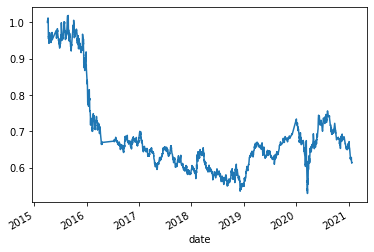

In [8]:
# Plot Strategy Returns to examine performance
(1 + svm_1_signals_df['Strategy Returns']).cumprod().plot()

### Step 3: Split the data into training and testing datasets.

In [9]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
svm_1_X = svm_1_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
svm_1_X.head()

SMA_Fast  SMA_Slow
date                                   
2015-04-02 15:00:00   24.9175   24.3214
2015-04-02 15:15:00   24.9200   24.3308
2015-04-02 15:30:00   24.9250   24.3360
2015-04-02 15:45:00   24.9325   24.3411
2015-04-06 09:30:00   24.9475   24.3463

In [10]:
# Create the target set selecting the Signal column and assiging it to y
svm_1_y = svm_1_signals_df['Signal']

# Review the value counts
svm_1_y.value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [11]:
# Select the start of the training period
svm_1_training_begin = svm_1_X.index.min()

# Display the training begin date
print(svm_1_training_begin)

2015-04-02 15:00:00


In [12]:
# Select the ending period for the training data with an offset of 3 months
svm_1_training_end = svm_1_X.index.min() + DateOffset(months=3)

# Display the training end date
print(svm_1_training_end)

2015-07-02 15:00:00


In [13]:
# Generate the X_train and y_train DataFrames
svm_1_X_train = svm_1_X.loc[svm_1_training_begin:svm_1_training_end]
svm_1_y_train = svm_1_y.loc[svm_1_training_begin:svm_1_training_end]

# Review the X_train DataFrame
svm_1_X_train.head()

SMA_Fast  SMA_Slow
date                                   
2015-04-02 15:00:00   24.9175   24.3214
2015-04-02 15:15:00   24.9200   24.3308
2015-04-02 15:30:00   24.9250   24.3360
2015-04-02 15:45:00   24.9325   24.3411
2015-04-06 09:30:00   24.9475   24.3463

In [14]:
# Generate the X_test and y_test DataFrames
X_test = svm_1_X.loc[svm_1_training_end+DateOffset(hours=1):]
svm_1_y_test = svm_1_y.loc[svm_1_training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
svm_1_X_train.head()

SMA_Fast  SMA_Slow
date                                   
2015-04-02 15:00:00   24.9175   24.3214
2015-04-02 15:15:00   24.9200   24.3308
2015-04-02 15:30:00   24.9250   24.3360
2015-04-02 15:45:00   24.9325   24.3411
2015-04-06 09:30:00   24.9475   24.3463

In [15]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
svm_1_X_scaler = scaler.fit(svm_1_X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
svm_1_X_train_scaled = svm_1_X_scaler.transform(svm_1_X_train)
svm_1_X_test_scaled = svm_1_X_scaler.transform(X_test)

---
---

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [16]:
# From SVM, instantiate SVC classifier model instance
svm_1_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_1_model = svm_1_model.fit(svm_1_X_train_scaled, svm_1_y_train)
 
# Use the testing data to make the model predictions
svm_1_pred = svm_1_model.predict(svm_1_X_test_scaled)

# Review the model's predicted values
svm_1_pred[:100]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [17]:
# Use the trained model to predict the trading signals for the testing data.
svm_1_testing_signal_predictions = svm_1_pred

# Use a classification report to evaluate the model using the predictions and testing data
svm_1_testing_report = classification_report(svm_1_y_test, svm_1_testing_signal_predictions)

# Print the classification report
print(svm_1_testing_report)

              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [18]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
svm_1_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
svm_1_predictions_df['Predicted'] = svm_1_testing_signal_predictions

# Add the actual returns to the DataFrame
svm_1_predictions_df['Actual Returns'] = svm_1_signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
svm_1_predictions_df['Strategy Returns - SVM'] = svm_1_predictions_df["Actual Returns"] * svm_1_predictions_df["Predicted"]


# Review the DataFrame
display(svm_1_predictions_df.head(5))
display(svm_1_predictions_df.tail(10))

Predicted  Actual Returns  Strategy Returns - SVM
date                                                                  
2015-07-06 10:00:00        1.0       -0.025715               -0.025715
2015-07-06 10:45:00        1.0        0.007237                0.007237
2015-07-06 14:15:00        1.0       -0.009721               -0.009721
2015-07-06 14:30:00        1.0       -0.003841               -0.003841
2015-07-07 11:30:00        1.0       -0.018423               -0.018423

Predicted  Actual Returns  Strategy Returns - SVM
date                                                                  
2021-01-14 15:45:00        1.0        0.006126                0.006126
2021-01-19 09:30:00        1.0        0.009132                0.009132
2021-01-19 11:15:00        1.0       -0.002413               -0.002413
2021-01-19 12:30:00        1.0       -0.003024               -0.003024
2021-01-20 09:45:00        1.0        0.016075                0.016075
2021-01-22 09:30:00        1.0       -0.006866               -0.006866
2021-01-22 11:30:00        1.0        0.002405                0.002405
2021-01-22 13:45:00        1.0        0.002099                0.002099
2021-01-22 14:30:00        1.0        0.001496                0.001496
2021-01-22 15:45:00        1.0       -0.000896               -0.000896

### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

In [19]:
# Plot the actual returns
actual_returns_hvplot = (1 + svm_1_predictions_df[["Actual Returns"]]).cumprod().hvplot(title="Actual vs. Strategy Returns - SVM", x="date", line_color=(['lightgray']))

actual_returns_hvplot = actual_returns_hvplot.opts(width=800, height=400).opts(title="Actual Returns")

<AxesSubplot:title={'center':'Actual vs. SVM Returns'}, xlabel='date'>

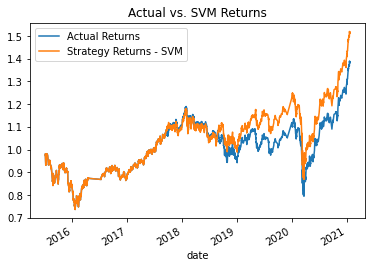

In [20]:
# Plot the actual returns versus the strategy returns
svm_1_returns_plot = (1 + svm_1_predictions_df[["Actual Returns", "Strategy Returns - SVM"]]).cumprod().plot(title="Actual vs. SVM Returns")

svm_1_returns_plot

In [21]:
# Plot the actual returns versus the strategy returns
svm_1_returns_hvplot = (1 + svm_1_predictions_df[["Strategy Returns - SVM", "Actual Returns"]]).cumprod().hvplot(title="Strategy Returns - SVM", x="date", line_color=(['darkblue', 'lightgray']))

svm_1_returns_hvplot.opts(legend_position='top_left').opts(width=800, height=400)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

![image](https://github.com/sfkonrad/M14_Challenge_Submission/blob/main/M14_Challenge_Submission/Documentation/Images_14/plt_SVM1_vs_Actual_Returns.png?raw=true)

---
---
---
---

## Tune the Baseline Trading Algorithm

## Step 6: Use an Alternative ML Model and Evaluate Strategy Returns

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

# ANSWER 

---

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

# ANSWER 

---

### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

## Step 2: Generate trading signals using short- and long-window SMA values. 

In [22]:
# Filter the date index and close columns
svm_t_signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
svm_t_signals_df["Actual Returns"] = svm_t_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
svm_t_signals_df = svm_t_signals_df.dropna()

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

close  Actual Returns
date                                      
2015-01-21 11:00:00  23.98        0.006295
2015-01-22 15:00:00  24.42        0.018349
2015-01-22 15:15:00  24.44        0.000819
2015-01-22 15:30:00  24.46        0.000818
2015-01-26 12:30:00  24.33       -0.005315

close  Actual Returns
date                                      
2021-01-22 09:30:00  33.27       -0.006866
2021-01-22 11:30:00  33.35        0.002405
2021-01-22 13:45:00  33.42        0.002099
2021-01-22 14:30:00  33.47        0.001496
2021-01-22 15:45:00  33.44       -0.000896

In [23]:
# Tuned

# Set the short window and long window
svm_t_short_window = 3
svm_t_long_window = 110

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
svm_t_signals_df['SMA_Fast'] = svm_t_signals_df['close'].rolling(window=svm_t_short_window).mean()
svm_t_signals_df['SMA_Slow'] = svm_t_signals_df['close'].rolling(window=svm_t_long_window).mean()

svm_t_signals_df = svm_t_signals_df.dropna()

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

close  Actual Returns   SMA_Fast   SMA_Slow
date                                                            
2015-04-06 13:30:00  25.20        0.000794  25.196667  24.391091
2015-04-06 14:15:00  25.22        0.000794  25.200000  24.402364
2015-04-07 12:00:00  25.18       -0.001586  25.200000  24.409273
2015-04-07 15:45:00  25.13       -0.001986  25.176667  24.415545
2015-04-08 09:30:00  25.85        0.028651  25.386667  24.428182

close  Actual Returns   SMA_Fast   SMA_Slow
date                                                            
2021-01-22 09:30:00  33.27       -0.006866  33.246667  30.279500
2021-01-22 11:30:00  33.35        0.002405  33.373333  30.323409
2021-01-22 13:45:00  33.42        0.002099  33.346667  30.364591
2021-01-22 14:30:00  33.47        0.001496  33.413333  30.399682
2021-01-22 15:45:00  33.44       -0.000896  33.443333  30.439500

In [24]:
# Initialize the new Signal column
svm_t_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
svm_t_signals_df.loc[(svm_t_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
svm_t_signals_df.loc[(svm_t_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

close  Actual Returns   SMA_Fast   SMA_Slow  Signal
date                                                                    
2015-04-06 13:30:00  25.20        0.000794  25.196667  24.391091     1.0
2015-04-06 14:15:00  25.22        0.000794  25.200000  24.402364     1.0
2015-04-07 12:00:00  25.18       -0.001586  25.200000  24.409273    -1.0
2015-04-07 15:45:00  25.13       -0.001986  25.176667  24.415545    -1.0
2015-04-08 09:30:00  25.85        0.028651  25.386667  24.428182     1.0

close  Actual Returns   SMA_Fast   SMA_Slow  Signal
date                                                                    
2021-01-22 09:30:00  33.27       -0.006866  33.246667  30.279500    -1.0
2021-01-22 11:30:00  33.35        0.002405  33.373333  30.323409     1.0
2021-01-22 13:45:00  33.42        0.002099  33.346667  30.364591     1.0
2021-01-22 14:30:00  33.47        0.001496  33.413333  30.399682     1.0
2021-01-22 15:45:00  33.44       -0.000896  33.443333  30.439500    -1.0

In [25]:
svm_t_signals_df['Signal'].value_counts()

 1.0    2359
-1.0    1854
Name: Signal, dtype: int64

In [26]:
# Calculate the strategy returns and add them to the svm_t_signals_df DataFrame
svm_t_signals_df['Strategy Returns - Tuned SVM'] = svm_t_signals_df['Actual Returns'] * svm_t_signals_df['Signal'].shift()

# predictions_df["Tuned SVM Returns"] = predictions_df["Actual Returns"] * fin_predictions_df["svm_t_predicted_signal"]

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

close  Actual Returns   SMA_Fast   SMA_Slow  Signal  Strategy Returns - Tuned SVM
date                                                                                                  
2015-04-06 13:30:00  25.20        0.000794  25.196667  24.391091     1.0                           NaN
2015-04-06 14:15:00  25.22        0.000794  25.200000  24.402364     1.0                      0.000794
2015-04-07 12:00:00  25.18       -0.001586  25.200000  24.409273    -1.0                     -0.001586
2015-04-07 15:45:00  25.13       -0.001986  25.176667  24.415545    -1.0                      0.001986
2015-04-08 09:30:00  25.85        0.028651  25.386667  24.428182     1.0                     -0.028651

close  Actual Returns   SMA_Fast   SMA_Slow  Signal  Strategy Returns - Tuned SVM
date                                                                                                  
2021-01-22 09:30:00  33.27       -0.006866  33.246667  30.279500    -1.0                     -0.006866
2021-01-22 11:30:00  33.35        0.002405  33.373333  30.323409     1.0                     -0.002405
2021-01-22 13:45:00  33.42        0.002099  33.346667  30.364591     1.0                      0.002099
2021-01-22 14:30:00  33.47        0.001496  33.413333  30.399682     1.0                      0.001496
2021-01-22 15:45:00  33.44       -0.000896  33.443333  30.439500    -1.0                     -0.000896

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

# ANSWER 

---

### Step 3: Split the data into training and testing datasets.

In [27]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
svm_t_X = svm_t_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
svm_t_X.head()

SMA_Fast   SMA_Slow
date                                     
2015-04-06 14:15:00  25.196667  24.391091
2015-04-07 12:00:00  25.200000  24.402364
2015-04-07 15:45:00  25.200000  24.409273
2015-04-08 09:30:00  25.176667  24.415545
2015-04-08 09:45:00  25.386667  24.428182

In [28]:
# Create the target set selecting the Signal column and assiging it to y
svm_t_y = svm_t_signals_df['Signal']

# Review the value counts
svm_t_y.value_counts()

 1.0    2359
-1.0    1854
Name: Signal, dtype: int64

In [29]:
# TuneD

# Select the start of the training period
svm_t_training_begin = svm_t_X.index.min() + DateOffset(months=0)

# Display the training begin date
print(svm_t_training_begin)

2015-04-06 14:15:00


In [30]:
# TuneD

# Select the ending period for the training data with an offset of __ months
svm_t_training_end = svm_t_training_begin + DateOffset(months=3)

# Display the training end date
print(svm_t_training_end)

2015-07-06 14:15:00


In [31]:
# Generate the X_train and y_train DataFrames
svm_t_X_train = svm_t_X.loc[svm_t_training_begin:svm_t_training_end]
svm_t_y_train = svm_t_y.loc[svm_t_training_begin:svm_t_training_end]

# Review the X_train DataFrame
print('Training DataFrame')
svm_t_X_train.head()

Training DataFrame


SMA_Fast   SMA_Slow
date                                     
2015-04-06 14:15:00  25.196667  24.391091
2015-04-07 12:00:00  25.200000  24.402364
2015-04-07 15:45:00  25.200000  24.409273
2015-04-08 09:30:00  25.176667  24.415545
2015-04-08 09:45:00  25.386667  24.428182

In [32]:
# Generate the X_test and y_test DataFrames
X_test = svm_t_X.loc[svm_t_training_end+DateOffset(hours=1):]
svm_t_y_test = svm_t_y.loc[svm_t_training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
print('Testing DataFrame')
svm_t_X_train.head()

Testing DataFrame


SMA_Fast   SMA_Slow
date                                     
2015-04-06 14:15:00  25.196667  24.391091
2015-04-07 12:00:00  25.200000  24.402364
2015-04-07 15:45:00  25.200000  24.409273
2015-04-08 09:30:00  25.176667  24.415545
2015-04-08 09:45:00  25.386667  24.428182

In [33]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
svm_t_X_scaler = scaler.fit(svm_t_X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
svm_t_X_train_scaled = svm_t_X_scaler.transform(svm_t_X_train)
X_test_scaled = svm_t_X_scaler.transform(X_test)

### Step 3: Split the data into training and testing datasets.

In [34]:
# From SVM, instantiate SVC classifier model instance
svm_t_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_t_model = svm_t_model.fit(svm_t_X_train_scaled, svm_t_y_train)
 
# Use the testing data to make the model predictions
svm_t_pred = svm_t_model.predict(X_test_scaled)

# Review the model's predicted values
svm_t_pred[:100]

array([-1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

### Step 5: Review the classification report associated with the `Tuned SVC` model predictions. 

### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [35]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
svm_t_predictions_df = pd.DataFrame(index=X_test.index)

# Add the Tuned SVM model predictions to the DataFrame
svm_t_predictions_df['Predicted'] = svm_t_pred

# Add the actual returns to the DataFrame
svm_t_predictions_df['Actual Returns'] = svm_t_signals_df["Actual Returns"]

# Add the Tuned SVM model predictions to the DataFrame
svm_t_predictions_df['Strategy Returns - SVM'] = svm_1_predictions_df['Strategy Returns - SVM']

# Add the strategy returns to the DataFrame
svm_t_predictions_df['Strategy Returns - Tuned SVM'] = svm_t_predictions_df["Actual Returns"] * svm_t_predictions_df["Predicted"]

# Review the DataFrame
display(svm_t_predictions_df.head(5))
display(svm_t_predictions_df.tail(10))

Predicted  Actual Returns  Strategy Returns - SVM  Strategy Returns - Tuned SVM
date                                                                                                
2015-07-07 11:30:00       -1.0       -0.018423               -0.018423                      0.018423
2015-07-07 13:45:00       -1.0        0.005674                0.005674                     -0.005674
2015-07-07 15:00:00       -1.0        0.005642                0.005642                     -0.005642
2015-07-07 15:45:00       -1.0       -0.001295               -0.001295                      0.001295
2015-07-08 10:00:00       -1.0       -0.021175               -0.021175                      0.021175

Predicted  Actual Returns  Strategy Returns - SVM  Strategy Returns - Tuned SVM
date                                                                                                
2021-01-14 15:45:00        1.0        0.006126                0.006126                      0.006126
2021-01-19 09:30:00        1.0        0.009132                0.009132                      0.009132
2021-01-19 11:15:00        1.0       -0.002413               -0.002413                     -0.002413
2021-01-19 12:30:00        1.0       -0.003024               -0.003024                     -0.003024
2021-01-20 09:45:00        1.0        0.016075                0.016075                      0.016075
2021-01-22 09:30:00        1.0       -0.006866               -0.006866                     -0.006866
2021-01-22 11:30:00        1.0        0.002405                0.002405                      0.002405
2021-01-22 13:45:00        1.0        0.002099                0.002099                      0.002099
2021-01-22 14:30:00        1.0        0.001496                0.001496                      0.001496
2021-01-22 15:45:00        1.0       -0.000896               -0.000896                     -0.000896

### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<AxesSubplot:title={'center':'Actual vs. Strategy Returns'}, xlabel='date'>

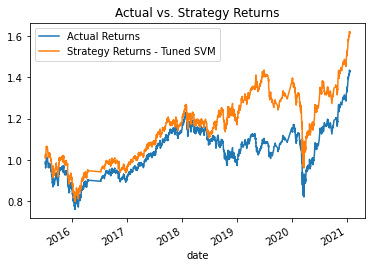

In [36]:
# Plot the actual returns versus the strategy returns
svm_t_returns_plot = (1 + svm_t_predictions_df[["Actual Returns", "Strategy Returns - Tuned SVM"]]).cumprod().plot(title="Actual vs. Strategy Returns")

svm_t_returns_plot

In [37]:
# Plot the actual returns versus the strategy returns
svm_t_returns_hvplot = (1 + svm_t_predictions_df[["Strategy Returns - Tuned SVM", "Strategy Returns - SVM", "Actual Returns"]]).cumprod().hvplot(title="Strategy Returns - Tuned SVM", x="date", line_color=(['orange', 'darkblue', 'lightgray']))

svm_t_returns_hvplot = svm_t_returns_hvplot.opts(legend_position='top_left').opts(width=800, height=400)

svm_t_returns_hvplot

:NdOverlay   [Variable]
   :Curve   [date]   (value)

![image](https://github.com/sfkonrad/M14_Challenge_Submission/blob/main/M14_Challenge_Submission/Documentation/Images_14/plt_2SVM_vs_Actual_Returns.png?raw=true)

In [38]:
# Use the trained model to predict the trading signals for the testing data.
svm_t_testing_signal_predictions = svm_t_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_t_testing_report = classification_report(svm_t_y_test, svm_t_testing_signal_predictions)

# Print the classification report
print("Tuned SVM Classification Report")
print(svm_t_testing_report)

Tuned SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.42      0.06      0.11      1801
         1.0       0.56      0.93      0.70      2287

    accuracy                           0.55      4088
   macro avg       0.49      0.50      0.41      4088
weighted avg       0.50      0.55      0.44      4088



---
---
---
---


## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [39]:
# Filter the date index and close columns
lr_signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
lr_signals_df["Actual Returns"] = lr_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
lr_signals_df = lr_signals_df.dropna()

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

close  Actual Returns
date                                      
2015-01-21 11:00:00  23.98        0.006295
2015-01-22 15:00:00  24.42        0.018349
2015-01-22 15:15:00  24.44        0.000819
2015-01-22 15:30:00  24.46        0.000818
2015-01-26 12:30:00  24.33       -0.005315

close  Actual Returns
date                                      
2021-01-22 09:30:00  33.27       -0.006866
2021-01-22 11:30:00  33.35        0.002405
2021-01-22 13:45:00  33.42        0.002099
2021-01-22 14:30:00  33.47        0.001496
2021-01-22 15:45:00  33.44       -0.000896

## Step 2: Generate trading signals using short- and long-window SMA values. 

In [40]:
# Tune
# 3
# 32

# Set the short window and long window
lr_short_window = 3
lr_long_window = 32

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
lr_signals_df['SMA_Fast'] = lr_signals_df['close'].rolling(window=lr_short_window).mean()
lr_signals_df['SMA_Slow'] = lr_signals_df['close'].rolling(window=lr_long_window).mean()

lr_signals_df = lr_signals_df.dropna()

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

close  Actual Returns   SMA_Fast   SMA_Slow
date                                                            
2015-02-10 10:30:00  23.99       -0.005802  24.090000  24.109687
2015-02-10 11:00:00  23.98       -0.000417  24.033333  24.109687
2015-02-11 15:00:00  24.02        0.001668  23.996667  24.097188
2015-02-11 15:15:00  24.02        0.000000  24.006667  24.084062
2015-02-12 14:30:00  24.36        0.014155  24.133333  24.080937

close  Actual Returns   SMA_Fast   SMA_Slow
date                                                            
2021-01-22 09:30:00  33.27       -0.006866  33.246667  31.749375
2021-01-22 11:30:00  33.35        0.002405  33.373333  31.854063
2021-01-22 13:45:00  33.42        0.002099  33.346667  31.951094
2021-01-22 14:30:00  33.47        0.001496  33.413333  32.049844
2021-01-22 15:45:00  33.44       -0.000896  33.443333  32.145469

In [41]:
# Initialize the new Signal column
lr_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
lr_signals_df.loc[(lr_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
lr_signals_df.loc[(lr_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

close  Actual Returns   SMA_Fast   SMA_Slow  Signal
date                                                                    
2015-02-10 10:30:00  23.99       -0.005802  24.090000  24.109687    -1.0
2015-02-10 11:00:00  23.98       -0.000417  24.033333  24.109687    -1.0
2015-02-11 15:00:00  24.02        0.001668  23.996667  24.097188     1.0
2015-02-11 15:15:00  24.02        0.000000  24.006667  24.084062     1.0
2015-02-12 14:30:00  24.36        0.014155  24.133333  24.080937     1.0

close  Actual Returns   SMA_Fast   SMA_Slow  Signal
date                                                                    
2021-01-22 09:30:00  33.27       -0.006866  33.246667  31.749375    -1.0
2021-01-22 11:30:00  33.35        0.002405  33.373333  31.854063     1.0
2021-01-22 13:45:00  33.42        0.002099  33.346667  31.951094     1.0
2021-01-22 14:30:00  33.47        0.001496  33.413333  32.049844     1.0
2021-01-22 15:45:00  33.44       -0.000896  33.443333  32.145469    -1.0

In [42]:
lr_signals_df['Signal'].value_counts()

 1.0    2415
-1.0    1876
Name: Signal, dtype: int64

In [43]:
# Calculate the strategy returns and add them to the lr_signals_df DataFrame
lr_signals_df['Strategy Returns - LR'] = lr_signals_df['Actual Returns'] * lr_signals_df['Signal'].shift()

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

close  Actual Returns   SMA_Fast   SMA_Slow  Signal  Strategy Returns - LR
date                                                                                           
2015-02-10 10:30:00  23.99       -0.005802  24.090000  24.109687    -1.0                    NaN
2015-02-10 11:00:00  23.98       -0.000417  24.033333  24.109687    -1.0               0.000417
2015-02-11 15:00:00  24.02        0.001668  23.996667  24.097188     1.0              -0.001668
2015-02-11 15:15:00  24.02        0.000000  24.006667  24.084062     1.0               0.000000
2015-02-12 14:30:00  24.36        0.014155  24.133333  24.080937     1.0               0.014155

close  Actual Returns   SMA_Fast   SMA_Slow  Signal  Strategy Returns - LR
date                                                                                           
2021-01-22 09:30:00  33.27       -0.006866  33.246667  31.749375    -1.0              -0.006866
2021-01-22 11:30:00  33.35        0.002405  33.373333  31.854063     1.0              -0.002405
2021-01-22 13:45:00  33.42        0.002099  33.346667  31.951094     1.0               0.002099
2021-01-22 14:30:00  33.47        0.001496  33.413333  32.049844     1.0               0.001496
2021-01-22 15:45:00  33.44       -0.000896  33.443333  32.145469    -1.0              -0.000896

### Step 3: Split the data into training and testing datasets.

In [44]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
lr_X = lr_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
lr_X.head()

SMA_Fast   SMA_Slow
date                                     
2015-02-10 11:00:00  24.090000  24.109687
2015-02-11 15:00:00  24.033333  24.109687
2015-02-11 15:15:00  23.996667  24.097188
2015-02-12 14:30:00  24.006667  24.084062
2015-02-13 13:00:00  24.133333  24.080937

In [45]:
# Create the target set selecting the Signal column and assiging it to y
lr_y = lr_signals_df['Signal']

# Review the value counts
lr_y.value_counts()

 1.0    2415
-1.0    1876
Name: Signal, dtype: int64

In [46]:
# Tune



# Select the start of the training period
lr_training_begin = lr_X.index.min() + DateOffset(months=0)
# Display the training begin date
print(lr_training_begin)

2015-02-10 11:00:00


In [47]:
# Tune



# Select the ending period for the training data with an offset of -__ months
lr_training_end = lr_training_begin + DateOffset(months=3)

# Display the training end date
print(lr_training_end)

2015-05-10 11:00:00


In [48]:
# Generate the X_train and y_train DataFrames
lr_X_train = lr_X.loc[lr_training_begin:lr_training_end]
lr_y_train = lr_y.loc[lr_training_begin:lr_training_end]

# Review the X_train DataFrame
lr_X_train.head()

SMA_Fast   SMA_Slow
date                                     
2015-02-10 11:00:00  24.090000  24.109687
2015-02-11 15:00:00  24.033333  24.109687
2015-02-11 15:15:00  23.996667  24.097188
2015-02-12 14:30:00  24.006667  24.084062
2015-02-13 13:00:00  24.133333  24.080937

In [49]:
# Generate the X_test and y_test DataFrames
X_test = lr_X.loc[lr_training_end+DateOffset(hours=1):]
lr_y_test = lr_y.loc[lr_training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_test.head()

SMA_Fast   SMA_Slow
date                                     
2015-06-02 12:30:00  25.753333  25.955625
2015-06-02 13:45:00  25.340000  25.925312
2015-06-02 14:00:00  25.116667  25.895625
2015-06-02 14:15:00  24.903333  25.865625
2015-06-03 10:00:00  24.910000  25.833750

In [50]:
# Scale the features DataFrames

# Create a StandardScaler instance
lr_scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
lr_X_scaler = lr_scaler.fit(lr_X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
lr_X_train_scaled = lr_X_scaler.transform(lr_X_train)
X_test_scaled = lr_X_scaler.transform(X_test)

### Step 4: Use the `Logistic Regression` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [51]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()
 
# Fit the model to the data using the training data
logistic_regression_model.fit(lr_X_train_scaled, lr_y_train)

# Use the testing data to make the model predictions
lr_training_signal_predictions = logistic_regression_model.predict(X_test_scaled)

# Review the model's predicted values
lr_training_signal_predictions[:100]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Step 5: Review the classification report associated with the `Logistic Regrsion` model predictions. 

In [52]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(lr_y_test, lr_testing_signal_predictions)

# Print the classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.44      0.18      0.26      1826
         1.0       0.56      0.82      0.67      2321

    accuracy                           0.54      4147
   macro avg       0.50      0.50      0.46      4147
weighted avg       0.51      0.54      0.49      4147



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [53]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
lr_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
lr_predictions_df['Predicted'] = lr_testing_signal_predictions

# Add the actual returns to the DataFrame
lr_predictions_df['Actual Returns'] = lr_signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
lr_predictions_df['Strategy Returns - LR'] = lr_predictions_df["Actual Returns"] * lr_predictions_df["Predicted"]


# Review the DataFrame
display(lr_predictions_df.head(5))
display(lr_predictions_df.tail(10))

Predicted  Actual Returns  Strategy Returns - LR
date                                                                 
2015-06-02 12:30:00        1.0       -0.025832              -0.025832
2015-06-02 13:45:00        1.0        0.000804               0.000804
2015-06-02 14:00:00        1.0        0.000000               0.000000
2015-06-02 14:15:00        1.0        0.000000               0.000000
2015-06-03 10:00:00        1.0       -0.007226              -0.007226

Predicted  Actual Returns  Strategy Returns - LR
date                                                                 
2021-01-14 15:45:00       -1.0        0.006126              -0.006126
2021-01-19 09:30:00       -1.0        0.009132              -0.009132
2021-01-19 11:15:00       -1.0       -0.002413               0.002413
2021-01-19 12:30:00       -1.0       -0.003024               0.003024
2021-01-20 09:45:00       -1.0        0.016075              -0.016075
2021-01-22 09:30:00       -1.0       -0.006866               0.006866
2021-01-22 11:30:00       -1.0        0.002405              -0.002405
2021-01-22 13:45:00       -1.0        0.002099              -0.002099
2021-01-22 14:30:00       -1.0        0.001496              -0.001496
2021-01-22 15:45:00       -1.0       -0.000896               0.000896

### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<AxesSubplot:title={'center':'Actual vs. Strategy Returns - LR'}, xlabel='date'>

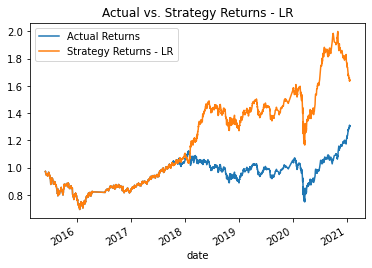

In [54]:
# Plot the actual returns versus the strategy returns
lr_returns_plot = (1 + lr_predictions_df[["Actual Returns", "Strategy Returns - LR"]]).cumprod().plot(title="Actual vs. Strategy Returns - LR")

lr_returns_plot

In [55]:
# Plot the actual returns versus the strategy returns
lr_returns_hvplot = (1 + lr_predictions_df[["Strategy Returns - LR", "Actual Returns"]]).cumprod().hvplot(title="Actual vs. Strategy Returns - LR", x="date", line_color=(['green', 'lightgray']))

lr_returns_hvplot.opts(legend_position='top_left').opts(width=800, height=400)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

![image](https://github.com/sfkonrad/M14_Challenge_Submission/blob/main/M14_Challenge_Submission/Documentation/Images_14/plt_LR_vs_Actual_Returns.png?raw=true)

---
---
---
---

### Step 3: Backtest the models to evaluate their performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 

# ANSWER 

---

Did this new model perform better or worse than your tuned trading algorithm?

# ANSWER 

---

In [56]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_1_testing_report = classification_report(svm_1_y_test, svm_1_testing_signal_predictions)

# Print the classification report
print("SVM Classification Report")
print(svm_1_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



In [57]:
# Use the trained model to predict the trading signals for the testing data.
# svm_t_testing_signal_predictions = svm_t_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_t_testing_report = classification_report(svm_t_y_test, svm_t_testing_signal_predictions)

# Print the classification report
print("Tuned SVM Classification Report")
print(svm_t_testing_report)

Tuned SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.42      0.06      0.11      1801
         1.0       0.56      0.93      0.70      2287

    accuracy                           0.55      4088
   macro avg       0.49      0.50      0.41      4088
weighted avg       0.50      0.55      0.44      4088



In [58]:
# Use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(lr_y_test, lr_testing_signal_predictions)

# Print the classification report
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.44      0.18      0.26      1826
         1.0       0.56      0.82      0.67      2321

    accuracy                           0.54      4147
   macro avg       0.50      0.50      0.46      4147
weighted avg       0.51      0.54      0.49      4147



In [59]:
# Create a new empty predictions DataFrame using code provided below.
fin_predictions_df = pd.DataFrame(index=X_test.index)
fin_predictions_df["svm_1_predicted_signal"] = svm_1_predictions_df['Predicted']
fin_predictions_df["svm_t_predicted_signal"] = svm_t_predictions_df['Predicted']
fin_predictions_df["lr_predicted_signal"] = lr_predictions_df['Predicted']

fin_predictions_df["Actual Returns"] = svm_1_signals_df["Actual Returns"]

fin_predictions_df["SVM Returns"] = fin_predictions_df["Actual Returns"] * fin_predictions_df["svm_1_predicted_signal"]

fin_predictions_df["Tuned SVM Returns"] = fin_predictions_df["Actual Returns"] * fin_predictions_df["svm_t_predicted_signal"]

fin_predictions_df["LR Returns"] = fin_predictions_df["Actual Returns"] * fin_predictions_df["lr_predicted_signal"]


fin_predictions_df.head(120)

svm_1_predicted_signal  svm_t_predicted_signal  lr_predicted_signal  Actual Returns  SVM Returns  Tuned SVM Returns  LR Returns
date                                                                                                                                                
2015-06-02 12:30:00                     NaN                     NaN                  1.0       -0.025832          NaN                NaN   -0.025832
2015-06-02 13:45:00                     NaN                     NaN                  1.0        0.000804          NaN                NaN    0.000804
2015-06-02 14:00:00                     NaN                     NaN                  1.0        0.000000          NaN                NaN    0.000000
2015-06-02 14:15:00                     NaN                     NaN                  1.0        0.000000          NaN                NaN    0.000000
2015-06-03 10:00:00                     NaN                     NaN                  1.0       -0.007226          NaN                NaN   -0.007226
2015-06-03 10:15:00                     NaN                     NaN                  1.0        0.002426          NaN                NaN    0.002426
2015-06-03 10:30:00                     NaN                     NaN                  1.0        0.000403          NaN                NaN    0.000403
2015-06-03 10:45:00                     NaN                     NaN                  1.0        0.000000          NaN                NaN    0.000000
2015-06-04 12:15:00                     NaN                     NaN                  1.0       -0.011694          NaN                NaN   -0.011694
2015-06-08 15:45:00                     NaN                     NaN                  1.0       -0.006936          NaN                NaN   -0.006936
2015-06-09 09:45:00                     NaN                     NaN                  1.0       -0.008217          NaN                NaN   -0.008217
2015-06-09 10:30:00                     NaN                     NaN                  1.0        0.000000          NaN                NaN    0.000000
2015-06-09 11:00:00                     NaN                     NaN                  1.0        0.001243          NaN                NaN    0.001243
2015-06-09 13:15:00                     NaN                     NaN                  1.0        0.001655          NaN                NaN    0.001655
2015-06-09 15:45:00                     NaN                     NaN                  1.0        0.001239          NaN                NaN    0.001239
2015-06-10 10:15:00                     NaN                     NaN                  1.0        0.005363          NaN                NaN    0.005363
2015-06-10 11:30:00                     NaN                     NaN                  1.0        0.001641          NaN                NaN    0.001641
2015-06-11 09:45:00                     NaN                     NaN                  1.0        0.000819          NaN                NaN    0.000819
2015-06-11 12:00:00                     NaN                     NaN                  1.0       -0.002047          NaN                NaN   -0.002047
2015-06-11 12:15:00                     NaN                     NaN                  1.0        0.000000          NaN                NaN    0.000000
2015-06-11 14:00:00                     NaN                     NaN                  1.0        0.000410          NaN                NaN    0.000410
2015-06-11 14:15:00                     NaN                     NaN                  1.0        0.000000          NaN                NaN    0.000000
2015-06-11 15:00:00                     NaN                     NaN                  1.0       -0.003690          NaN                NaN   -0.003690
2015-06-11 15:15:00                     NaN                     NaN                  1.0        0.002058          NaN                NaN    0.002058
2015-06-12 10:00:00                     NaN                     NaN                  1.0        0.001232          NaN                NaN    0.00123

In [61]:
# Plot the actual returns versus the LR strategy returns
fin_predictions_df_hvplot = (1 + fin_predictions_df[[
    "SVM Returns", "Tuned SVM Returns", "LR Returns", "Actual Returns"]]
                            ).cumprod().hvplot(title="Actual vs. SVM and LR Strategy Returns", x="date", 
                                               line_color=(['darkblue', 'orange', 'green', 'lightgray']))

fin_predictions_df_hvplot.opts(legend_position='bottom_right').opts(width=800, height=400)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

![image](https://github.com/sfkonrad/M14_Challenge_Submission/blob/main/M14_Challenge_Submission/Documentation/Images_14/plt_ALL_vs_Actual_Returns.png?raw=true)